In [1]:
import numpy as np 
import pandas as pd 

In [3]:
from datetime import datetime
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import missingno as msno
from matplotlib import rcParams
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

 # Business Goal:
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. 

To gain understand about customer shopping behavior, I will  analyse the customer segmentation analysis. 

In this Kernel, I will develop several clustering models to gain a better understanding of the segmentation of customers and identify business strategies for each types of customer.

The Clustering model I will use are:
* K-means Clusters: Elbow Method
* K-means Clusters: Silhouette Method
* Hierarchical Agglomerative Clustering
* Gaussian Mixture Model


# KERNEL'S AGENDA:
## I. UNDERSTANDING THE DATA:
    1. Data Overview
    2. Data Cleaning
## II. RFM (Recency Frequency Monetary) ANALYSIS: 
    1. Calculating Monetary Value
    2. Calculating Frequency
    3. Calculating Recency
    4. Creating RFM dataset
## III. EDA ANALYSIS (EXPLORATORY DATA ANALYSIS):
    1. Remove Outlier
    2. Data Visualization
    3. Scale the data
## IV. CLUSTERING MODELS:
    1. K-means Clusters: Elbow Method
    2. K-means Clusters: Silhouette Method
    3. Hierarchical Agglomerative Clustering
## V. CLUSTER PROFILE:
    1. K-means Cluster: 3 Clusters
    2. Hierarchical Agglomerative Clustering: 2 Clusters
    3. Gaussian Mixture Model: 3 Clusters
## VI. CONCLUSION


# I. DATA OVERVIEW: 
## 1. Data Overview:

In [3]:
# import the data:
df = pd.read_csv("data.csv", delimiter=',', encoding = "ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
#Check the data information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo, StockCode, Description, InvoiceDate and Country are Non-numeric Variables

Quantity, UnitPrice and CustomerID are numeric Variables

--> Let's see what non-numeric variables and numeric variables differ in the description

In [5]:
#describe the non-numeric features
df.describe(exclude=['float64','int64']).T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


Through the description, there are some highlight we can discuss about:
* There are some missing data at 'Description" feature
* Unitied Kingdom domains the distribution of country feature( 495478 out of 541909) 

In [6]:
#describe the  numeric fearture
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


Highlight: 
* There are some missing values at CustomerID
* Quantity and UnitPrice suppose to be the positive value, howerver they receive the negative value as min value. Those negative values should be remove

## 2. Data Cleaning: Checking for Null Values

total number of obseration is: 541909


<AxesSubplot:>

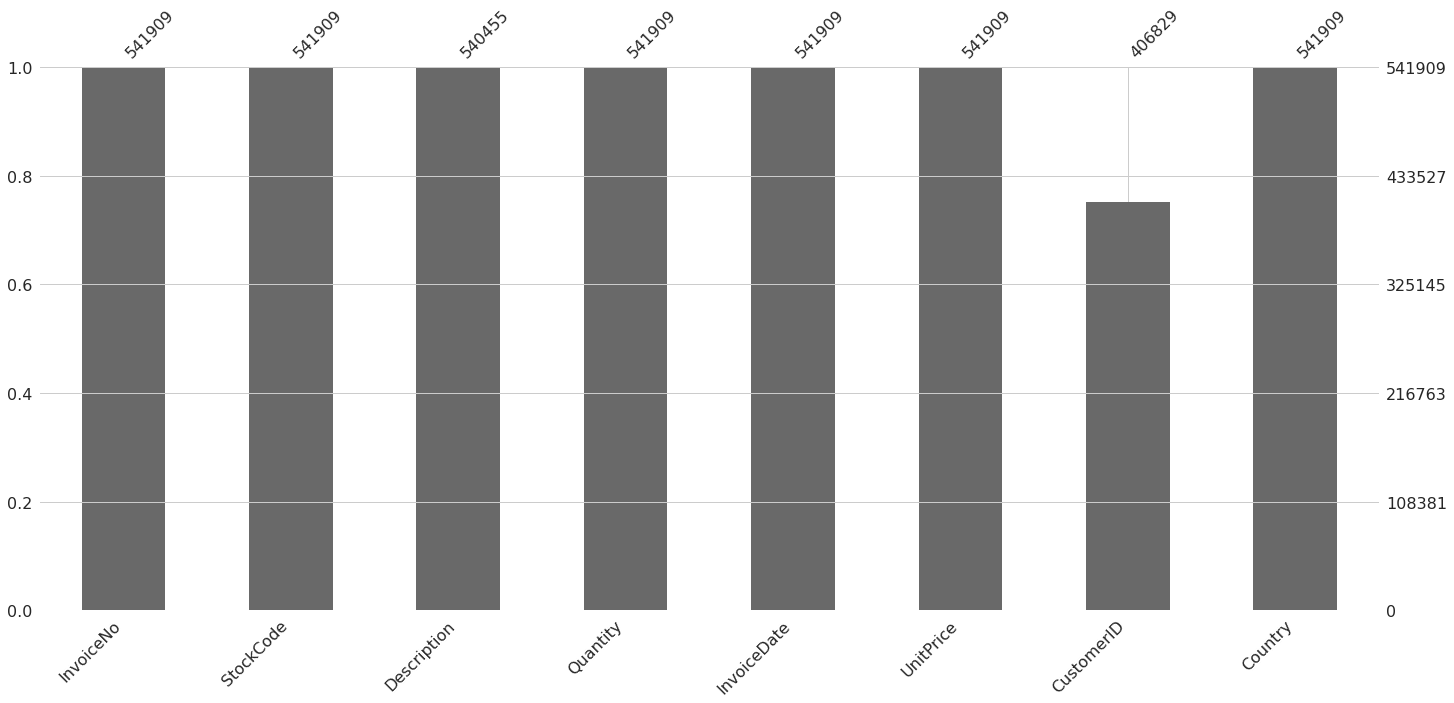

In [7]:
print ('total number of obseration is:',df.shape[0])
msno.bar(df)

We observed that CustomerID and Descriptive having missing data. We also can check the number of missing data using the below code:

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

I will delete all the missing data and then visualize the bar plot again 

In [9]:
df.dropna(inplace =True)

<AxesSubplot:>

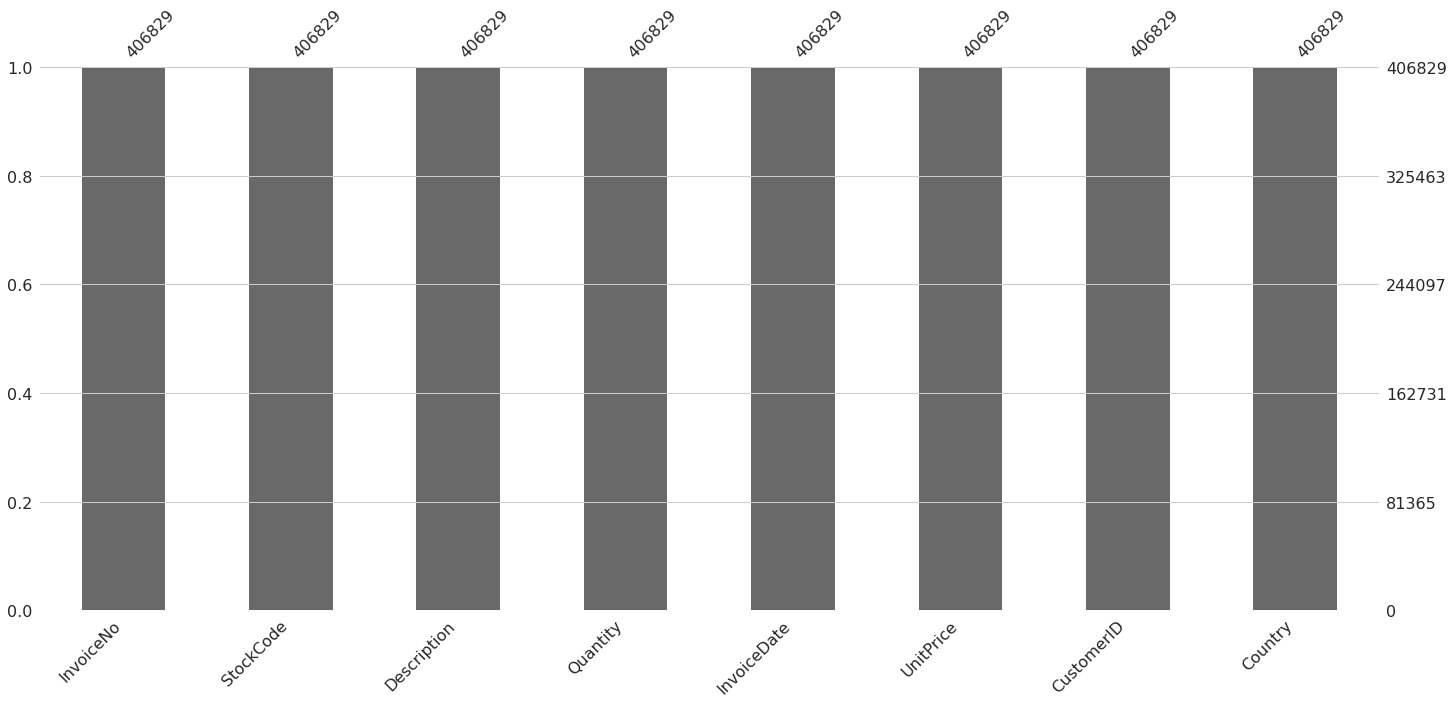

In [10]:
msno.bar(df)

The next thing I will examine is whether there are any negative value in numeric variable

I expect Quantity,UnitPrice	and CustomerID receive the postive value. I will drop the negative value if there are any

## Data Cleaning: Drop the Negative Values
Since there are some negative values in Quantity and Unitprice, I will drop the negative values.

In [11]:
# drop the negative value out 
df.drop(df[df['Quantity'] < 0].index, inplace = True)
df.drop(df[df['UnitPrice'] < 0].index, inplace = True)

In [12]:
#check whether are there any negative value:
df[df['Quantity']<0].shape[0], df[df['UnitPrice']<0].shape[0] 

(0, 0)

### Now the data is clean and ready to be used in the model!


## II. RFM ANALYSIS

Let's take a look from the original data to figure which data we can use for the customer analyzing:

In [13]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


We are going to analysis the Customers based on below 4 factors:
* Total amount a customer spent: Amount = Quantity * UnitPrice
* Number of transaction: Number of InvoiceNo by Customer
* Last transaction: the days since last transaction
* Country: country where customer made the transaction

## 1. Calculating Monetary Value (Total Amount):

In [14]:
# Total Amount:
df['TotalAmount']= df['Quantity']*df['UnitPrice']
tm=df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
tm

,CustomerID,TotalAmount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


## 2. Calculating Frequency (InvoiceNo):

In [15]:
#number_transaction:
nt=df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
nt

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


## 3. Calculating Recency (Last Transaction):

In [16]:
#Last transaction: 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Last_transaction']=(df['InvoiceDate'].max()-df['InvoiceDate']).dt.days
lt = df.groupby(['CustomerID','Country'])['Last_transaction'].max().reset_index()
lt

,CustomerID,Country,Last_transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


## 4. Creating RFM dataset:
Now, I will Merge and Create the RFM dataset: 

In [17]:
merge1= pd.merge(lt, nt, how='inner', on='CustomerID')
new_df=pd.merge(merge1,tm,how='inner',on= 'CustomerID')
new_df

,CustomerID,Country,Last_transaction,InvoiceNo,TotalAmount
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


# III. EDA ANALYSIS:
## 1. Remove Outlier: 
There are several method to remove outlier such as IQR method, Z-score Method, Standard Deviation Method.

In this kernel, I use IQR method to remove outliers.

First, I will plot the boxplot to show the distribution of new data

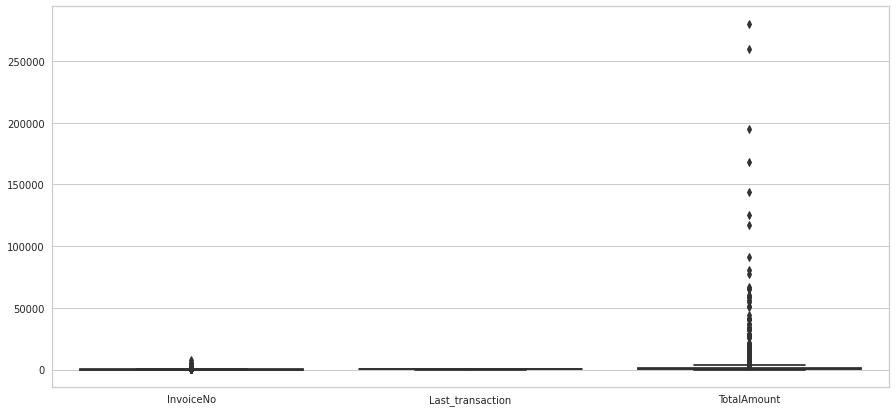

In [18]:
plt.figure(figsize=(15,7))
sns.boxplot(data = new_df[['InvoiceNo','Last_transaction','TotalAmount']])
plt.show()

As it shows in the plot, there are many outlier in TotalAmount feature. Let's drop them!

In [19]:
IQR= new_df['TotalAmount'].quantile(0.75)-new_df['TotalAmount'].quantile(0.25)
lower_limit= new_df['TotalAmount'].quantile(0.25) - 1.5*IQR
upper_limit=new_df['TotalAmount'].quantile(0.75) + 1.5*IQR
k=new_df[new_df['TotalAmount']>upper_limit]
m=new_df[new_df['TotalAmount']<lower_limit]
df_iqr=new_df[(new_df['TotalAmount']<upper_limit) & (new_df['TotalAmount']>lower_limit)]
print('Data shape before removing outlier',new_df.shape)
print('Data shape after removing outlier',df_iqr.shape)
print('Total number of outlier:',len(k)+len(m))


Data shape before removing outlier (4347, 5)
Data shape after removing outlier (3923, 5)
Total number of outlier: 424


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


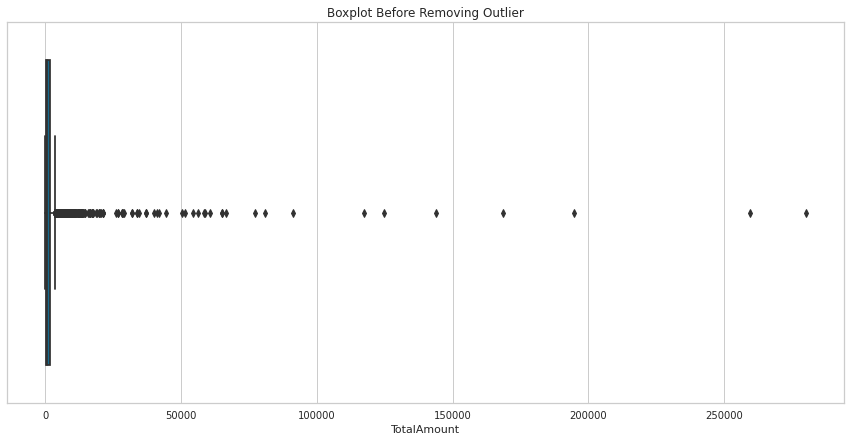

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


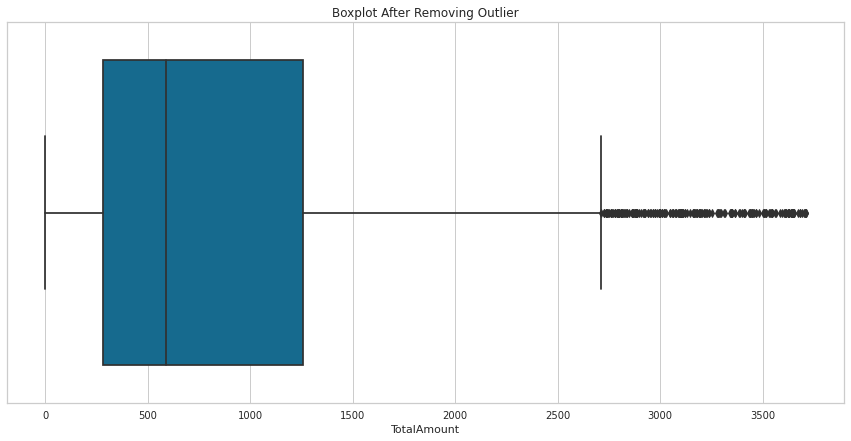

In [20]:
#### plot the boxplot before and after remove the outlier
plt.figure(figsize=(15,7))
sns.boxplot(new_df['TotalAmount'])
plt.title('Boxplot Before Removing Outlier')
plt.show()

plt.figure(figsize=(15,7))
sns.boxplot(df_iqr['TotalAmount'])
plt.title('Boxplot After Removing Outlier')
plt.show()

In [21]:
### The new data frame after removing outlier
df_iqr.reset_index(drop=True, inplace= True)
df_iqr

,CustomerID,Country,Last_transaction,InvoiceNo,TotalAmount
0,12348.0,Finland,357,31,1797.24
1,12349.0,Italy,18,73,1757.55
2,12350.0,Norway,309,17,334.40
3,12352.0,Norway,296,85,2506.04
4,12353.0,Bahrain,203,4,89.00
...,...,...,...,...,...
3918,18280.0,United Kingdom,277,10,180.60
3919,18281.0,United Kingdom,180,7,80.82
3920,18282.0,United Kingdom,125,12,178.05
3921,18283.0,United Kingdom,336,756,2094.88


Now, our data is clean now as we already delete null and outlier. Next step,Data visualization!

# 2. Data Visualization
## 2.1 Histogram

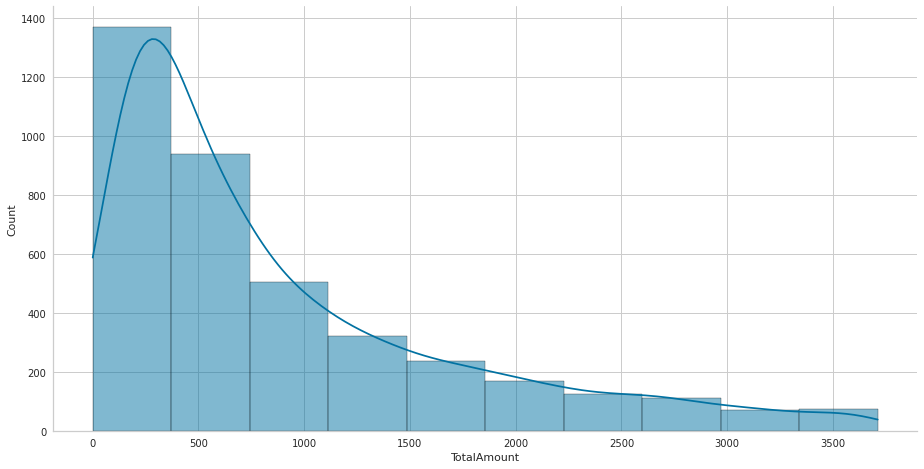

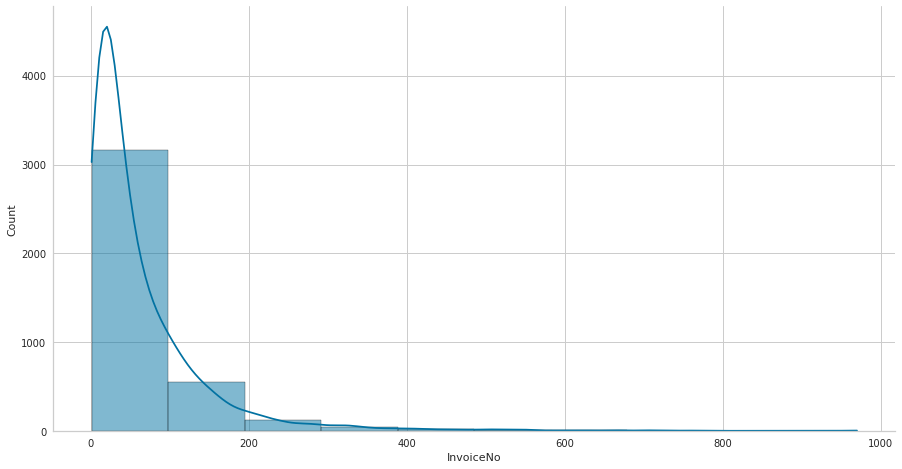

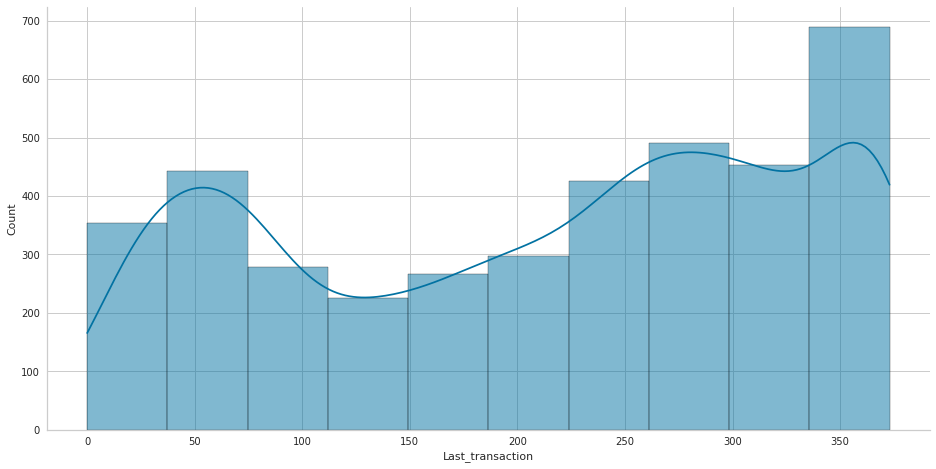

In [22]:
#Histogram Plot: 
new1_df=df_iqr.copy()
df_num=['TotalAmount','InvoiceNo','Last_transaction']
for i in df_num:
    sns.displot(new1_df[i],bins=10,kde=True)
    plt.gcf().set_size_inches(15, 7)
    plt.show()

Total Amount (Monetary) and InvoiceNo (Frequency) histogram are right-skewed

Last_Transaction (Recency) histogram is bimodal


## 2.2 Country Groupby Visualization

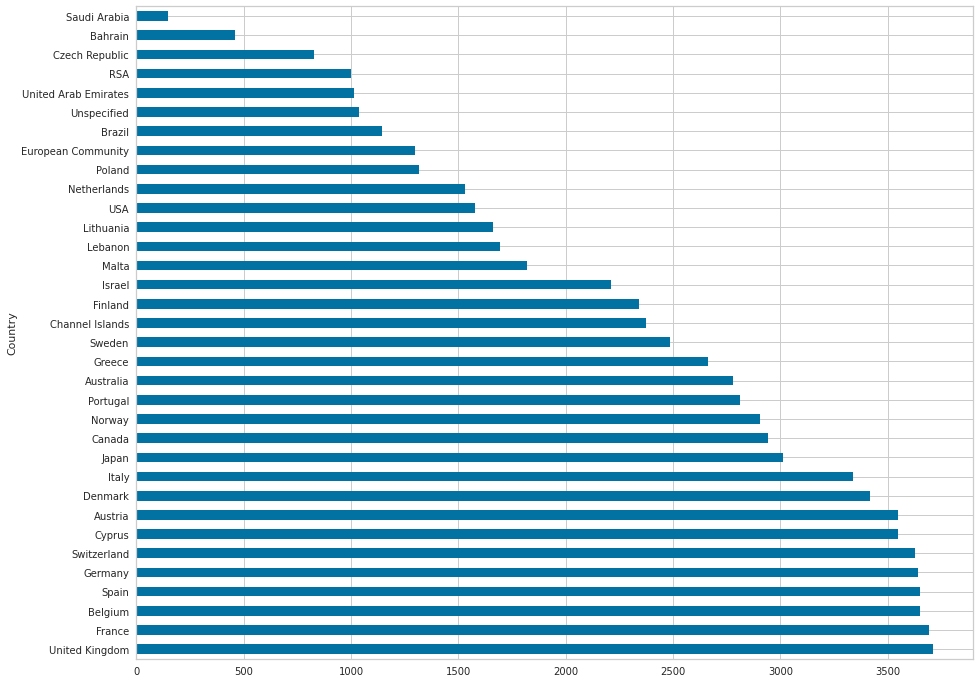

In [23]:
# Group the Maximum Total Amount by Country:
plt.figure(figsize=(15,12))
new1_df.groupby("Country").TotalAmount.max().sort_values(ascending=False).plot.barh()
plt.show()

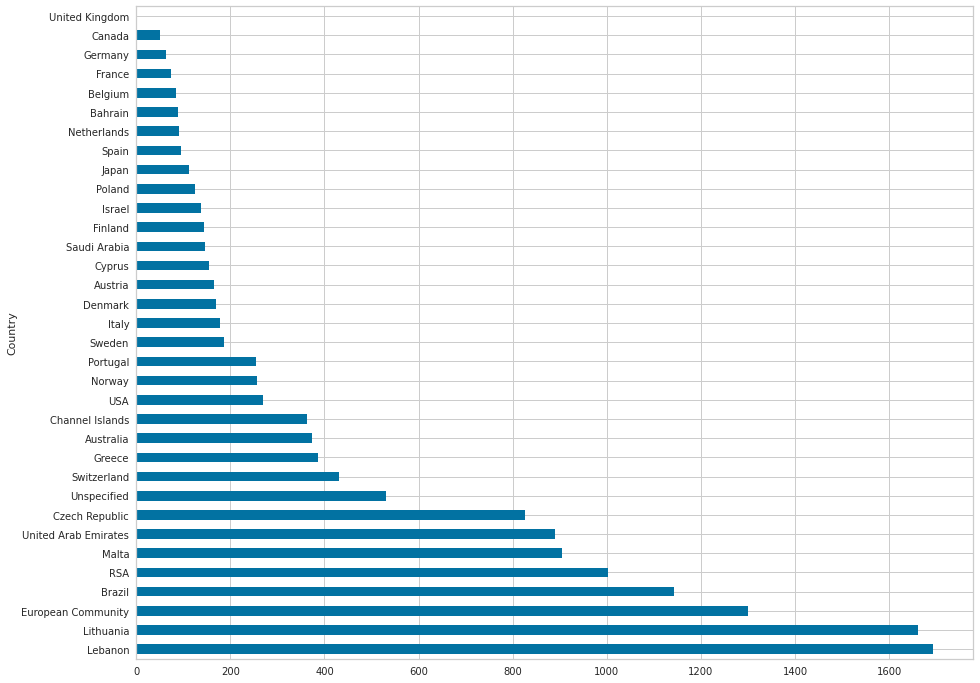

In [24]:
# Group the Minimum Total Amount by Country:
plt.figure(figsize=(15,12))
new1_df.groupby("Country").TotalAmount.min().sort_values(ascending=False).plot.barh()
plt.show()

As expected, Unitied Kingdom Spend the maximum Amount.

Lebanon is the country spend has least money for shopping.


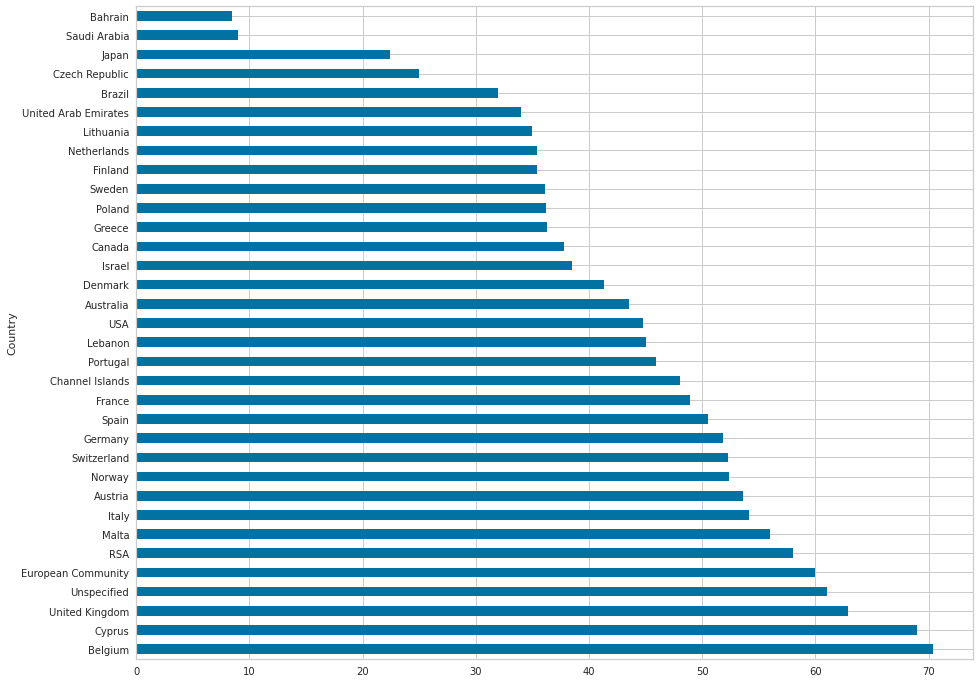

In [25]:
# Group by the Frequency by Country
plt.figure(figsize=(15,12))
new1_df.groupby("Country").InvoiceNo.mean().sort_values(ascending=False).plot.barh()
plt.show()

On Average, customers in Belgium shop most frequently

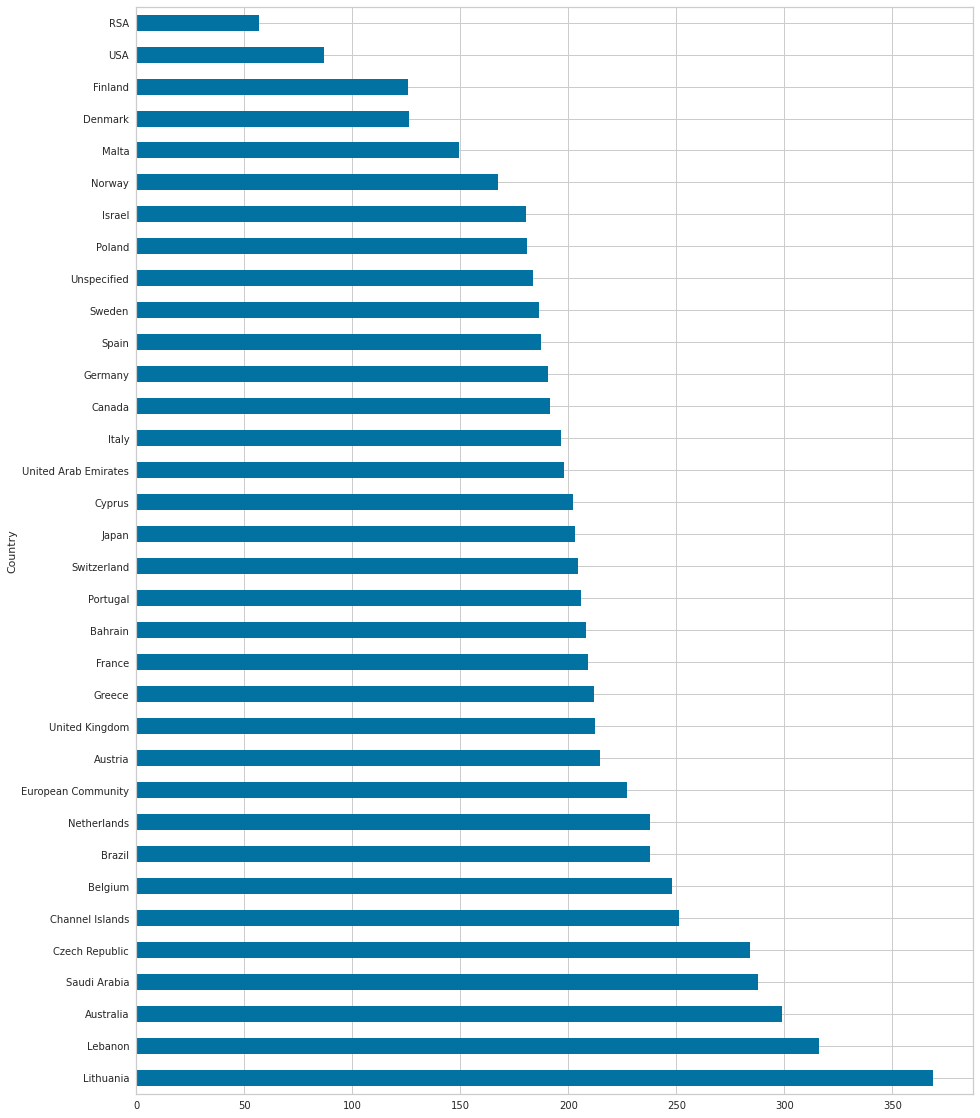

In [26]:
plt.figure(figsize=(15,20))
new1_df.groupby("Country").Last_transaction.mean().sort_values(ascending=False).plot.barh()
plt.show()

On average, Customers in Lithuania shop the most recently

## 2.3 Heatmap:

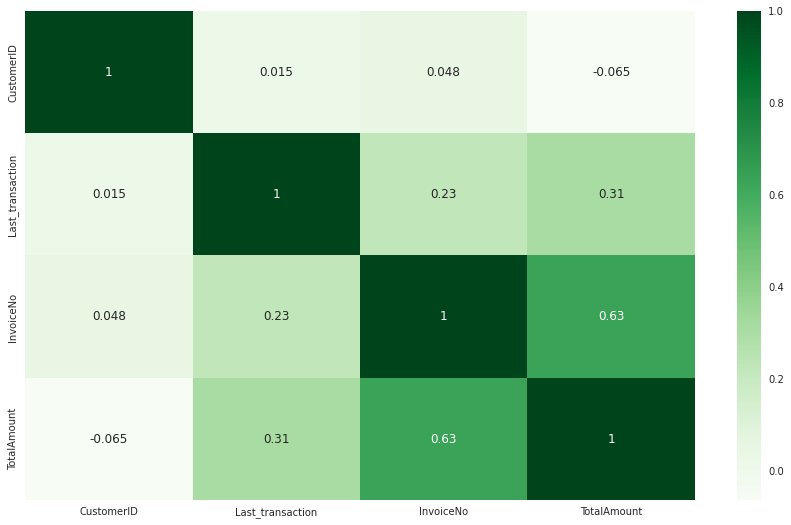

In [27]:
plt.figure(figsize=(15,9))
sns.heatmap(new1_df.corr(),cmap="Greens", annot=True)
plt.show()

Each square shows the correlation between the variables on each axis. 

Values closer to zero means there is no linear trend between the two variables. 

The close to 1 the correlation is the more positively correlated they are;

A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. 

As the heatmap shows, Total Amount and InvoiceNo is correlated positively 

## 2.4 Pairplot

<Figure size 1080x576 with 0 Axes>

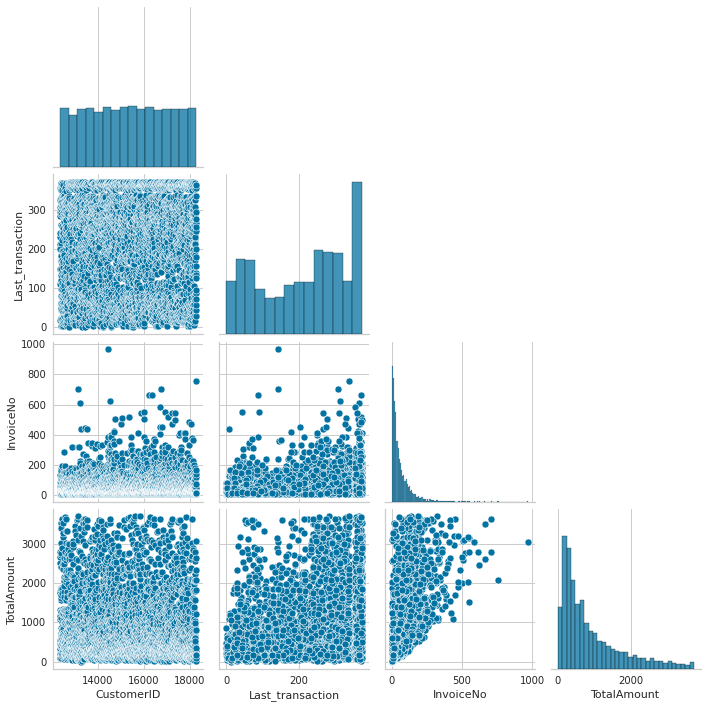

In [28]:
plt.figure(figsize=(15,8))
sns.pairplot(new1_df, corner=True)
plt.show()

## 3. Scaling the numeric data:
The scaling is used for making data points generalized so that the distance between them will be lower.

The two most popular techniques for scaling numerical data prior to modeling are normalization and standardization. 

* Normalization scales each input variable separately to the range 0-1
* Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one

I will normalize the data in this sample

In [29]:
new2_df=new1_df[['Last_transaction','InvoiceNo','TotalAmount']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns=['Last_transaction','InvoiceNo','TotalAmount']
scaled_df['Country']=new1_df['Country']
scaled_df

,Last_transaction,InvoiceNo,TotalAmount,Country
0,0.957105,0.030960,0.484200,Finland
1,0.048257,0.074303,0.473507,Italy
2,0.828418,0.016512,0.090092,Norway
3,0.793566,0.086687,0.675160,Norway
4,0.544236,0.003096,0.023978,Bahrain
...,...,...,...,...
3918,0.742627,0.009288,0.048656,United Kingdom
3919,0.482574,0.006192,0.021774,United Kingdom
3920,0.335121,0.011352,0.047969,United Kingdom
3921,0.900804,0.779154,0.564388,United Kingdom


## III. CLUSTERING METHODS:
## 1. K-means Clusters: Elbow Method

It is the simplest and commonly used iterative type unsupervised learning algorithm. In this, we randomly initialize the K number of centroids in the data (the number of k is found using the Elbow method which will be discussed later in this article ) and iterates these centroids until no change happens to the position of the centroid. Let’s go through the steps involved in K means clustering for a better understanding.
 

1) Select the number of clusters for the dataset ( K )
 

2) Select K number of centroids
 

3) By calculating the Euclidean distance or Manhattan distance assign the points to the nearest centroid, thus creating K groups
 

4) Now find the original centroid in each group
 

5) Again reassign the whole data point based on this new centroid, then repeat step 4 until the position of the centroid doesn’t change.

Finding the optimal number of clusters is an important part of this algorithm. A commonly used method for finding optimal K value is **Elbow Method**. 

In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ).

As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. 

The K value corresponding to this point is the optimal K value or an optimal number of clusters.
 

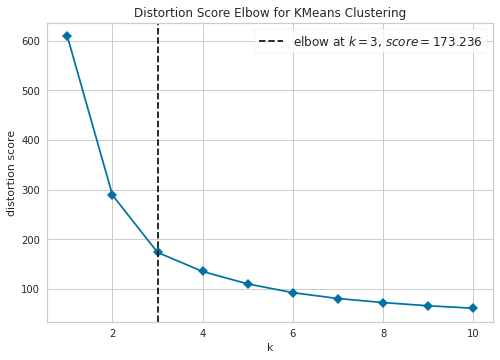

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_k)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

Elbow method helps us decide the clusters for our data are 3. Next step I want to visualize the data by clusters

## 2. K-means Clusters: Silhouette Method

In [31]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
df_k

,Last_transaction,InvoiceNo,TotalAmount
0,0.957105,0.030960,0.484200
1,0.048257,0.074303,0.473507
2,0.828418,0.016512,0.090092
3,0.793566,0.086687,0.675160
4,0.544236,0.003096,0.023978
...,...,...,...
3918,0.742627,0.009288,0.048656
3919,0.482574,0.006192,0.021774
3920,0.335121,0.011352,0.047969
3921,0.900804,0.779154,0.564388


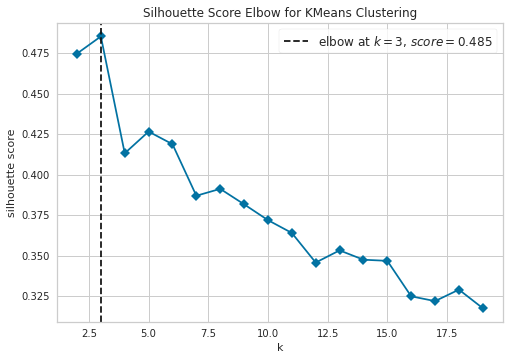

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [32]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= False)
visualizer.fit(df_k)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Number of clusters created by Sihouette Method are 3. Now we will plot the clusters to see how the data distributed.

In [33]:
# Add the number of cluster columns in the data frame
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_k)
df_k['clusters']= y_predicted
df_k

,Last_transaction,InvoiceNo,TotalAmount,clusters
0,0.957105,0.030960,0.484200,0
1,0.048257,0.074303,0.473507,1
2,0.828418,0.016512,0.090092,2
3,0.793566,0.086687,0.675160,0
4,0.544236,0.003096,0.023978,2
...,...,...,...,...
3918,0.742627,0.009288,0.048656,2
3919,0.482574,0.006192,0.021774,1
3920,0.335121,0.011352,0.047969,1
3921,0.900804,0.779154,0.564388,0


In [34]:
# Cluster centroid:
km.cluster_centers_

array([[0.79768705, 0.15811971, 0.63364003],
       [0.22132246, 0.04001888, 0.14863076],
       [0.77726712, 0.04284313, 0.15751895]])

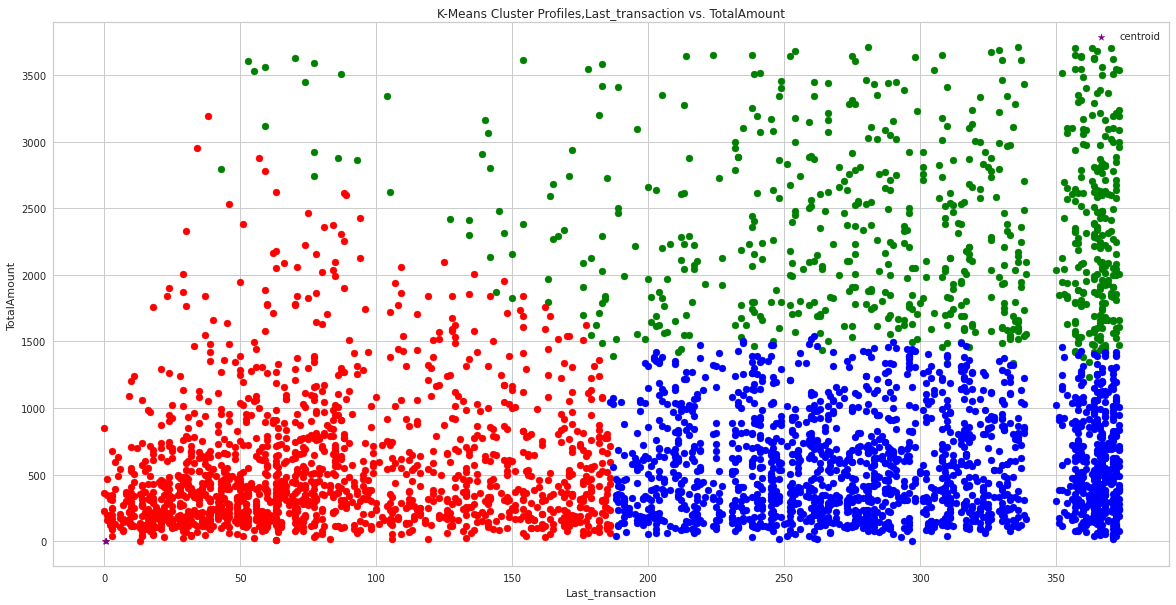

In [35]:
# Visualize the clusters with original data
new2_df['clusters']= y_predicted
df1 = new2_df[new2_df.clusters==0]
df2 = new2_df[new2_df.clusters==1]
df3 = new2_df[new2_df.clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction,df1['TotalAmount'],color='green')
plt.scatter(df2.Last_transaction,df2['TotalAmount'],color='red')
plt.scatter(df3.Last_transaction,df3['TotalAmount'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

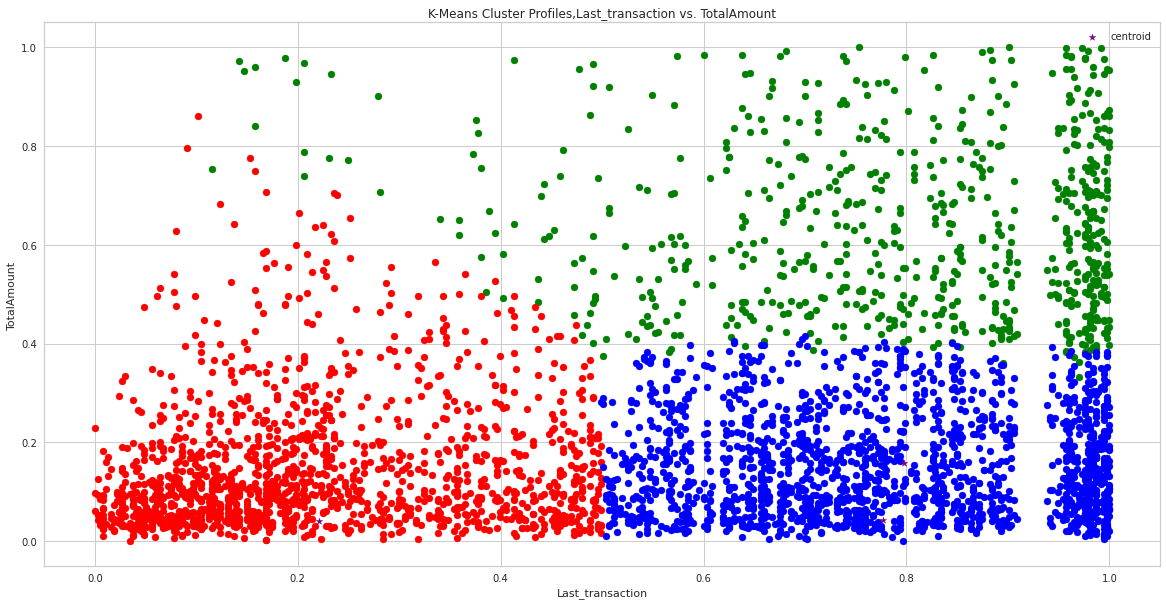

In [36]:
# Visualize the clusters with scaled data:
df1 = df_k[df_k.clusters==0]
df2 = df_k[df_k.clusters==1]
df3 = df_k[df_k.clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction,df1['TotalAmount'],color='green')
plt.scatter(df2.Last_transaction,df2['TotalAmount'],color='red')
plt.scatter(df3.Last_transaction,df3['TotalAmount'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

The K-Means model segments the data into distinct clusters based on customer's Recency(Last_transaction) and Monetary(TotalAmount).

Cluster 0  consists of customers with the last_transaction between 0 and 180 days, and total amount spent between 0 to $2500;

Cluster 1 consist of customers with the last_transaction between 180 and 400 days, and total amount spent between 0 and $1500;

Cluster 2 consits of custoemrs with the last_transaction between 50 and 400 days, and total amount spent between $1500 and $3500.

## 3. Hierarchical Agglomerative Clustering

In agglomerative clustering, the cluster formation starts with individual points. Each point is considered as one cluster.

Let’s say there are N data points. In the beginning, there will be N clusters. 

Then, the distance between each pair of cluster is found and the clusters closest to each other is matched and made as one cluster. This would result in (N – 1) cluster. 

In the next step, the distance between pair of clusters are found and the clusters closest to each other is matched and made as one cluster. 

This would result in (N – 2) clusters. The same process is repeated until all the data points are merged into one cluster. e.g., root cluster.


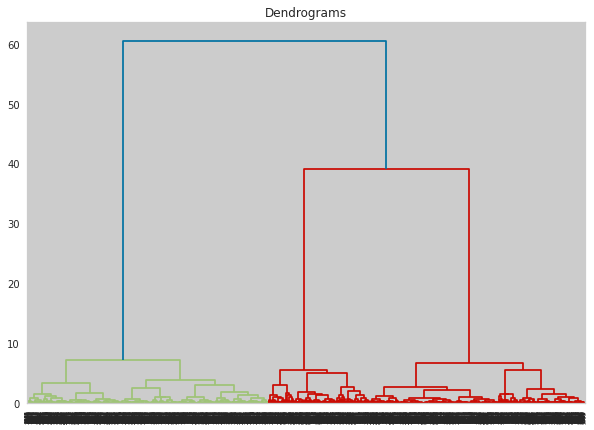

In [37]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_k, method='ward'))

Based on the above dendogram, lets select different number of clusters and create plot based on slicing the dendogram at different levels. 

Level 1: graph belows show in the first level there will be 2 clusters in the data 

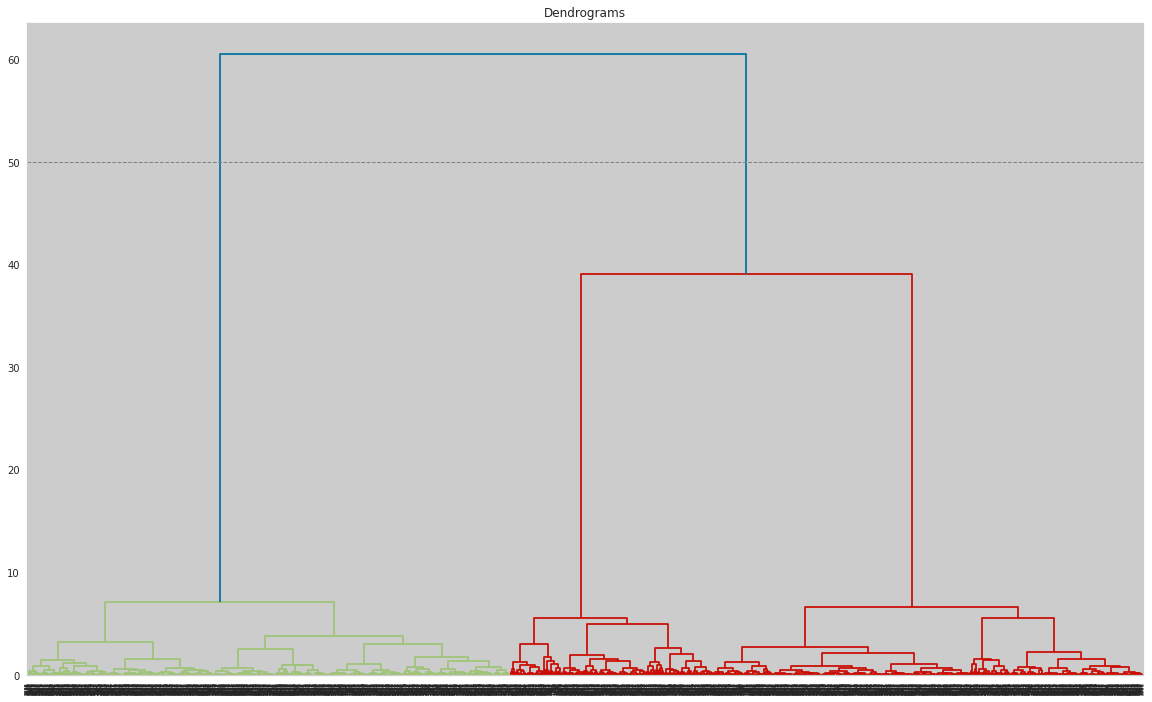

In [38]:
plt.figure(figsize=(20, 12))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_k, method='ward'))
plt.axhline(y=50, c='grey', lw=1, linestyle='dashed')
plt.show()

Level 2: graph belows show in the first level there will be 3 clusters in the data 

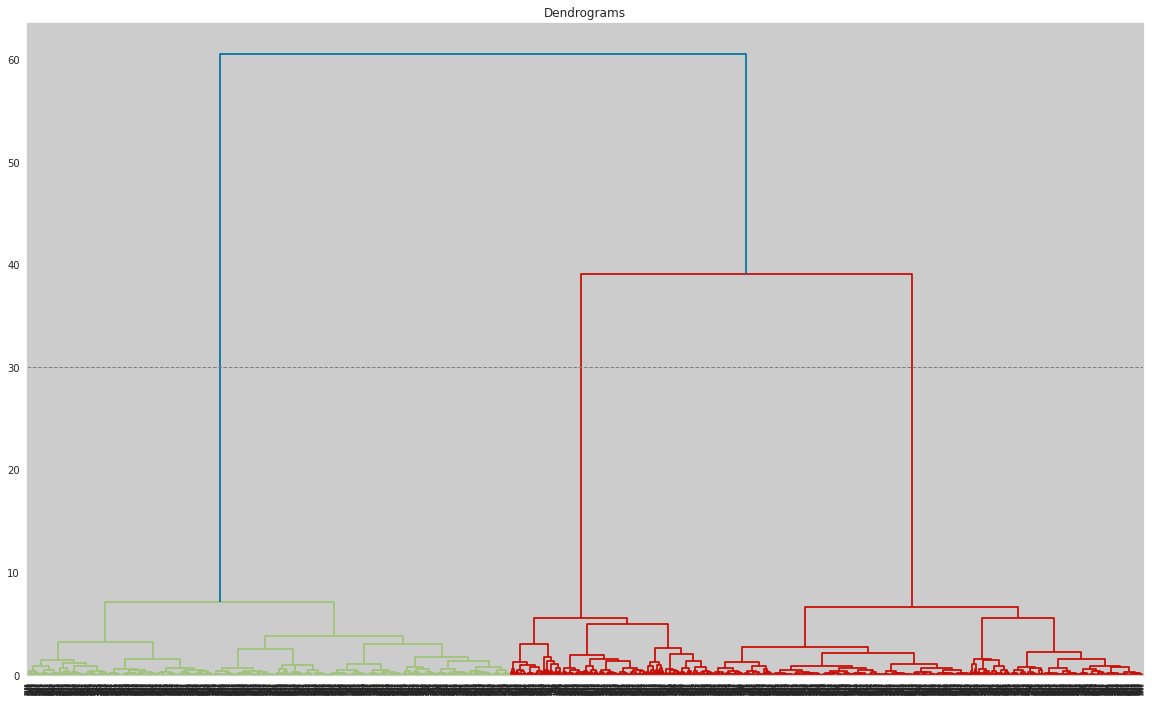

In [39]:
plt.figure(figsize=(20, 12))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_k, method='ward'))
plt.axhline(y=30, c='grey', lw=1, linestyle='dashed')
plt.show()

Next I will visualize the data with 2 and 3 cluster respectively and try to bring some insights.

First let group the country based on the number of clusters:

In [40]:
from sklearn.cluster import AgglomerativeClustering
cluster_new = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
two_clusters=cluster_new.fit_predict(df_k)

cluster_new = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
three_clusters=cluster_new.fit_predict(df_k)

df_k['two_clusters'] = two_clusters
df_k['three_clusters']= three_clusters
df_k


,Last_transaction,InvoiceNo,TotalAmount,clusters,two_clusters,three_clusters
0,0.957105,0.030960,0.484200,0,0,2
1,0.048257,0.074303,0.473507,1,0,1
2,0.828418,0.016512,0.090092,2,1,0
3,0.793566,0.086687,0.675160,0,0,2
4,0.544236,0.003096,0.023978,2,1,0
...,...,...,...,...,...,...
3918,0.742627,0.009288,0.048656,2,1,0
3919,0.482574,0.006192,0.021774,1,0,1
3920,0.335121,0.011352,0.047969,1,0,1
3921,0.900804,0.779154,0.564388,0,0,2


For 2 clusters, the data will be grouped like below:

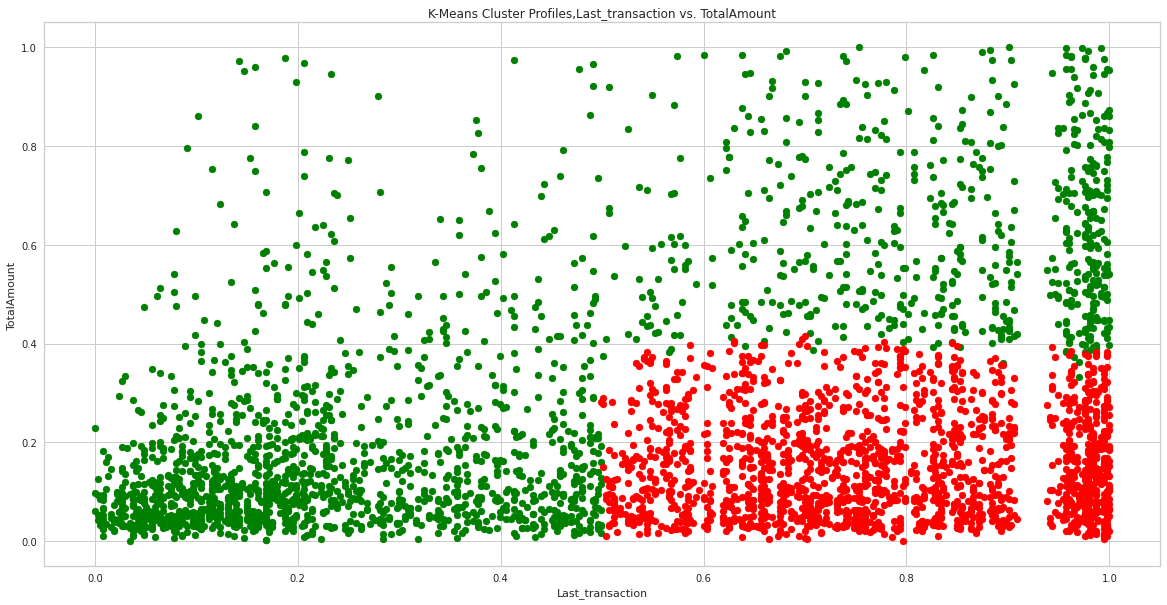

In [41]:
# Visualize the clusters with scaled data:
df1 = df_k[df_k.two_clusters==0]
df2 = df_k[df_k.two_clusters==1]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction,df1['TotalAmount'],color='green')
plt.scatter(df2.Last_transaction,df2['TotalAmount'],color='red')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

For 3 clusters, the data will be grouped like below:

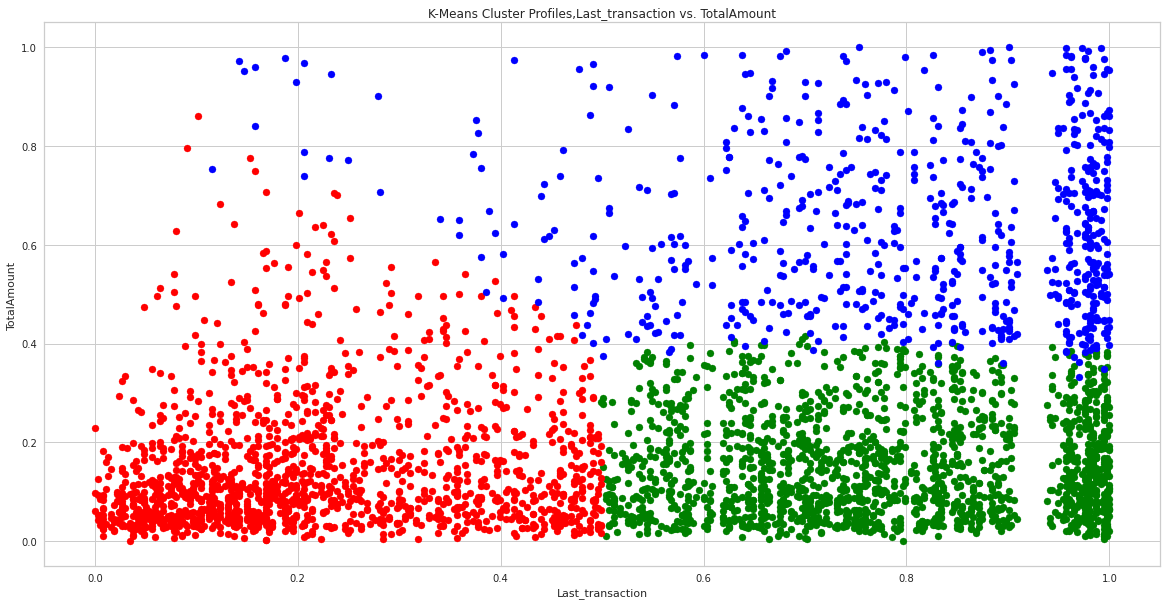

In [42]:
# Visualize the clusters with scaled data:
df1 = df_k[df_k.three_clusters==0]
df2 = df_k[df_k.three_clusters==1]
df3 = df_k[df_k.three_clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction,df1['TotalAmount'],color='green')
plt.scatter(df2.Last_transaction,df2['TotalAmount'],color='red')
plt.scatter(df3.Last_transaction,df3['TotalAmount'],color='blue')
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

## V. CLUSTERING PROFILE
Up to this point, we only plot the clusters plot with only two variables Last_transaction (Rerency) and Total_amount( Moneytary)

The plots belows will visualize the customer profiles based on the whole data RFM (last_transaction, Total Amount, and InvoiceNo)from each clustering model.

## 1. K-means Cluster: 3Clusters

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


Text(0.5, 0.92, 'K Means')

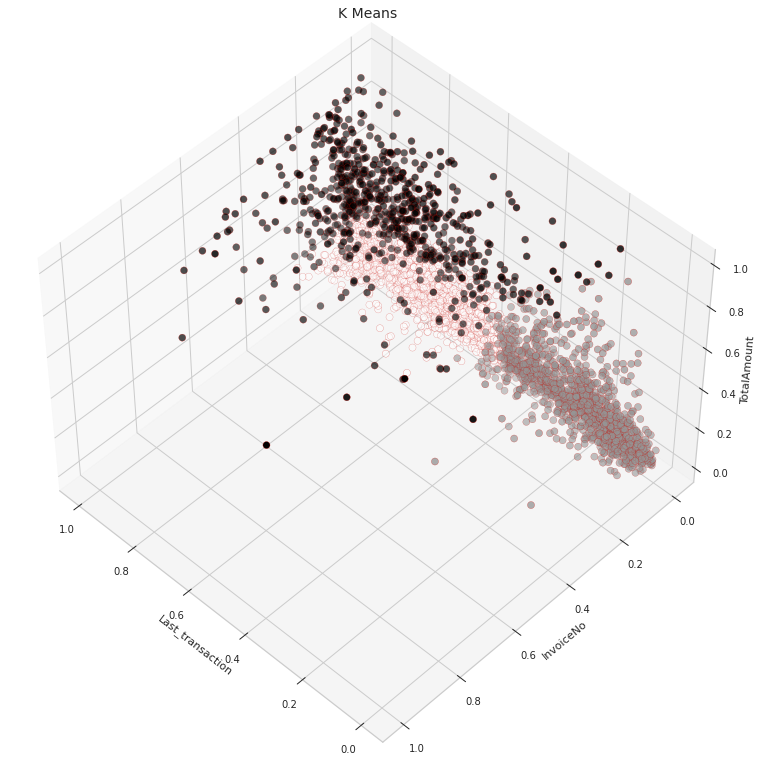

In [43]:
#KMeans Clusters with 3 Clusters
km = KMeans(n_clusters=3)
km.fit(df_k)
km.predict(df_k)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(20,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(df_k['Last_transaction'], 
           df_k['InvoiceNo'], 
           df_k['TotalAmount'],
          c=labels.astype(np.float), 
           edgecolor="r", s=50)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("TotalAmount")
plt.title("K Means", fontsize=14)

## 2. Hierarchical Agglomerative Clustering: 2 Clusters

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


Text(0.5, 0.92, 'K Means')

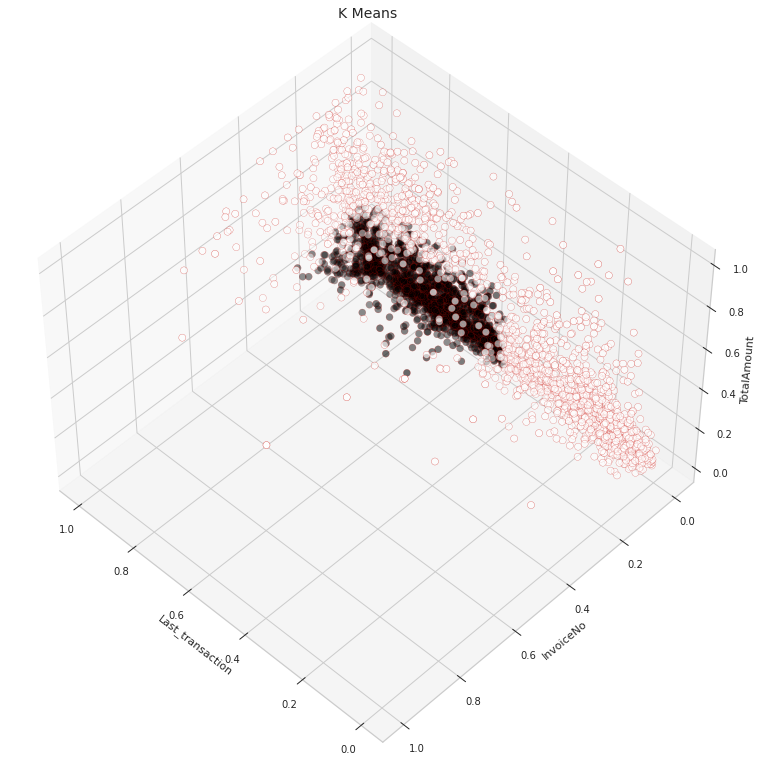

In [44]:
#KMeans Clusters with 2 Clusters
km = KMeans(n_clusters=2)
km.fit(df_k)
km.predict(df_k)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(20,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(df_k['Last_transaction'], 
           df_k['InvoiceNo'], 
           df_k['TotalAmount'],
          c=labels.astype(np.float), 
           edgecolor="r", s=50)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("TotalAmount")
plt.title("K Means", fontsize=14)

## 3. Gaussian Mixture Model: 3 Clusters

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  app.launch_new_instance()


Text(0.5, 0.92, 'Gaussian Mixture Model')

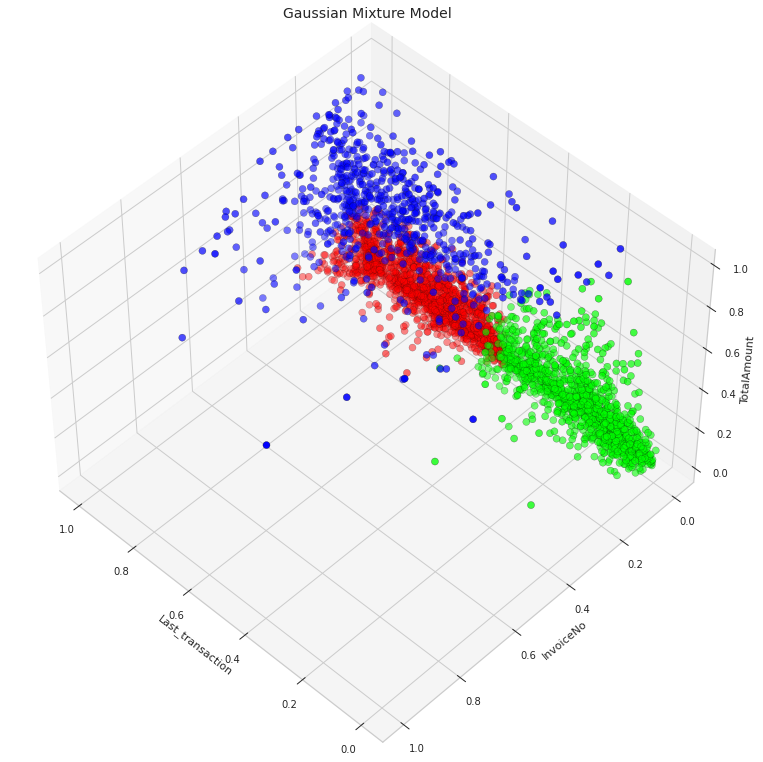

In [45]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets

#Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(df_k)
proba_lists = gmm.predict_proba(df_k)
#Plotting
colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
fig = plt.figure(1, figsize=(20,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(df_k['Last_transaction'], 
           df_k['InvoiceNo'], 
           df_k['TotalAmount'],
          c=colored_tuples, edgecolor="k", s=50)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("TotalAmount")
plt.title("Gaussian Mixture Model", fontsize=14)

## VI. CONCLUSION

Four clustering models were developed to explore customer behaviors in this sample:
* K-means Clusters: Elbow Method
* K-means Clusters: Silhouette Method
* Hierarchical Agglomerative Clustering
* Gaussian Mixture Model

Each model identified distinct customer segments that the company could target depending on their needs.

Base on customer spending behavior, the company can have different approaching and strategy for each customers group.


Using the three clusters found in the K-Means model, there are 3 different group of customers with different spending behaviors:



Group1:  customer spent up to $2500 per purchase and their lastest order is within 3 months

Group 2: customer spent up to $1500 per purchase and their lastest order is between 3 months to 13 months

Group 3: customer spent from $ 1500 to 3500 per purchase and their lastest order varies from 1.5 month to 13 months


In my opinion, customer in the first segmentaion is the most important segment of the company since they spend relatively high amount and they come back quite often for the next purchase.

In the future, to better understand customer preferences, additional data about could be used to further customize product offerings to each segment.
